# 1.1 Train

In [1]:
#imort libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

In [2]:
#import data
df_train = pd.read_csv('df-train_set.csv')

In [3]:
#view database
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [4]:
#filter golden apples
df_goldenApples = df_train.loc[df_train["Commodities"]=="APPLE GOLDEN DELICIOUS" ]

#view info and shape
df_goldenApples.shape

(1952, 13)

In [5]:
#check for missing values
df_goldenApples[df_goldenApples.isnull()].count()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

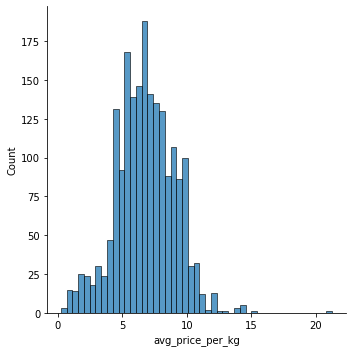

In [6]:
#view a distribution of a variable 
sns.displot(df_goldenApples["avg_price_per_kg"])

### based on the view we can see that the distribution has outliers

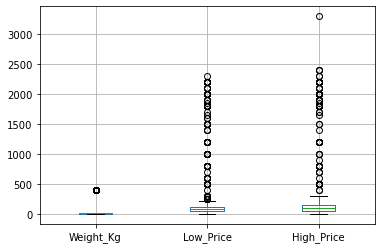

In [7]:
#View multiple of the distribution 
boxplot = df_goldenApples.boxplot(column=['Weight_Kg', 'Low_Price', 'High_Price'])

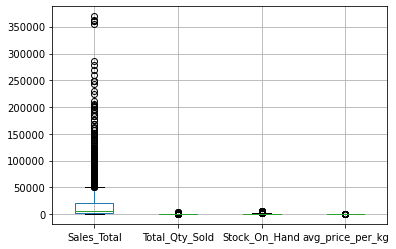

In [8]:
boxplot2 = df_goldenApples.boxplot(column=['Sales_Total', 'Total_Qty_Sold', 'Stock_On_Hand',"avg_price_per_kg"])

# 1.2 Removing outliers

In [13]:
#In order to remove my outlier need my columns to be float data

df_floatApples  = df_goldenApples.drop(columns =["Province","Container", "Commodities" , "Size_Grade","Date"] )

In [14]:
# transform the values to float 
cols =['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand','avg_price_per_kg']

# Create function.
def to_float(x):    
    "Transforms attribute columns to type float"
    
    if type(x) is int:
        return float(x)
    else:
        return x
    
#apply the function
df_floatApples[cols] = df_floatApples[cols].applymap(to_float)


In [15]:
#view dataframe 
df_floatApples.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Weight_Kg         1952 non-null   float64
 1   Low_Price         1952 non-null   float64
 2   High_Price        1952 non-null   float64
 3   Sales_Total       1952 non-null   float64
 4   Total_Qty_Sold    1952 non-null   float64
 5   Total_Kg_Sold     1952 non-null   float64
 6   Stock_On_Hand     1952 non-null   float64
 7   avg_price_per_kg  1952 non-null   float64
dtypes: float64(8)
memory usage: 137.2 KB


In [16]:
#Get Z-score for the distribution of the dataframe
from scipy import stats
z = np.abs(stats.zscore(df_floatApples))

#select value that have a treshold greater than 3
df_floatApples = df_floatApples[(z<3).all(axis =1)]

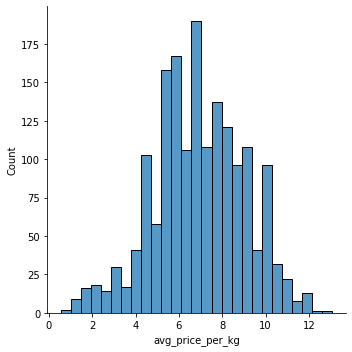

In [17]:
#View Data
sns.displot(df_floatApples["avg_price_per_kg"])

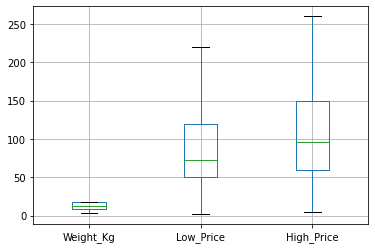

In [18]:
#we have reduced outliers
boxplot = df_floatApples.boxplot(column=['Weight_Kg', 'Low_Price', 'High_Price'])

# 1.3 Data selection 

In [19]:
#impot packages
from sklearn.linear_model import LinearRegression

# split predictors and response
X = df_floatApples.drop(["avg_price_per_kg"], axis = 1)
y = df_floatApples['avg_price_per_kg']

In [20]:
# create model object
lm = LinearRegression()

In [21]:
# import train/test split module
from sklearn.model_selection import train_test_split

In [22]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [23]:
# train model
lm.fit(X_train, y_train)

#make predictions
train_pred = lm.predict(X_train)
test_pred =lm.predict(X_test)


In [24]:
# extract model coeffs
m = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [25]:
m

,Coefficient
Weight_Kg,-0.404246
Low_Price,0.031659
High_Price,0.034013
Sales_Total,0.000039
Total_Qty_Sold,0.001908
Total_Kg_Sold,-0.000428
Stock_On_Hand,0.000037


# 1.4 Assesing Model 

In [26]:
from sklearn import metrics
from sklearn.metrics import r2_score
import math

In [27]:
results_dict = {'Training MSE':
                    {
                        "MLR": metrics.mean_squared_error(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                        "MLR": metrics.mean_squared_error(y_test, lm.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test)))
                    },
                
                
                }

In [28]:
# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
results_df

,Training MSE,Test MSE,Test RMSE
MLR,0.610078,0.635432,0.79714


In [29]:
y_predict = lm.predict(X_test)

In [30]:
r2 = r2_score(y_test, y_predict)

In [31]:
print(r2)

0.8659548427238012


# 1.5 Making predictions

In [32]:
#import data
df_test = pd.read_csv('df-test_set.csv', index_col=1)
df_test.head()
test_id = df_test['Index']
df_test = df_test.drop('Index', axis=1)

In [33]:
#filterin golden apples
df_goldenApples = df_test.loc[df_test["Commodities"]=="APPLE GOLDEN DELICIOUS" ]

In [34]:
df_test = df_goldenApples
df_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, W.CAPE-BERGRIVER ETC to CAPE
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Container       685 non-null    object 
 1   Size_Grade      685 non-null    object 
 2   Weight_Kg       685 non-null    float64
 3   Commodities     685 non-null    object 
 4   Date            685 non-null    object 
 5   Low_Price       685 non-null    float64
 6   High_Price      685 non-null    float64
 7   Sales_Total     685 non-null    float64
 8   Total_Qty_Sold  685 non-null    int64  
 9   Total_Kg_Sold   685 non-null    float64
 10  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 64.2+ KB


In [35]:
#Preprocessing the test data
df_test  = df_test.drop(columns =["Container", "Commodities" , "Size_Grade","Date"] )

In [36]:
# transform the values to float 
cols =['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand']

# Create function.
def to_float(x):    
    "Transforms attribute columns to type float"
    
    if type(x) is int:
        return float(x)
    else:
        return x
    
#apply the function
df_test[cols] = df_test[cols].applymap(to_float)

In [37]:
df_test.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
Province,,,,,,,
W.CAPE-BERGRIVER ETC,12.0,128.0,136.0,5008.0,38.0,456.0,0.0
W.CAPE-BERGRIVER ETC,18.3,220.0,220.0,1760.0,8.0,146.4,2.0
W.CAPE-BERGRIVER ETC,12.0,120.0,120.0,720.0,6.0,72.0,45.0
W.CAPE-BERGRIVER ETC,18.3,160.0,160.0,160.0,1.0,18.3,8.0
W.CAPE-BERGRIVER ETC,18.3,140.0,160.0,14140.0,100.0,1830.0,19.0


In [38]:
df_test.isnull().sum()

Weight_Kg         0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64

In [39]:
X_real = df_test

In [40]:
preds = lm.predict(X_real)

# 1.6 Submission

In [41]:
submission = pd.DataFrame(
    { 
         "Index" : test_id,
        "avg_price_per_kg" : preds
    }
)

In [42]:
submission.to_csv('submission.csv', index = False)

In [43]:
submission.shape

(685, 2)

In [ ]:
# There are error in the values in a sense that it has negative value.

In [44]:
submission.head(20)

,Index,avg_price_per_kg
Province,,
W.CAPE-BERGRIVER ETC,1,9.792983
W.CAPE-BERGRIVER ETC,2,12.963075
W.CAPE-BERGRIVER ETC,3,8.931112
W.CAPE-BERGRIVER ETC,4,9.001228
W.CAPE-BERGRIVER ETC,5,8.334114
CAPE,6,-40.766557
CAPE,7,4.061552
CAPE,8,7.508681
CAPE,9,8.441542


In [175]:
#storing model
pkl_file = "lm.pkl"  

with open(pkl_file, 'wb') as file:  
    pickle.dump(lm, file)

In [176]:
#loading model
with open(pkl_file, 'rb') as file:  
    Pickled_Model = pickle.load(file)
    
Pickled_Model

LinearRegression()

In [178]:
pred = Pickled_Model.predict(df_test[['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand']].values)

In [179]:
pred[:10]

array([  9.79298253,  12.96307475,   8.93111173,   9.00122787,
         8.33411371, -40.76655683,   4.06155238,   7.50868109,
         8.44154236,   9.66786081])